
Generally, the customers who stop using a product or service for a given period of time are referred to
as churners.

    We will follow the following steps

    1. Importing the libraries & Dataset
    2. Encoding Categorical data
    3. Splitting the Dataset into Training & Test set, Feature Scaling
    4. Creating & Compiling ANN (Artificial Neural Network)
    5. Applying ANN to the training dataset.
    6. Predicting the outcome using ANN.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

import tensorflow as tf

import pickle
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

# ignore warnings
import warnings
warnings.filterwarnings('ignore')
import importlib.util

In [2]:
# Importing the database
dataset = pd.read_csv('Churn_Modelling.csv')

In [3]:
# training_set = tf.contrib.learn.datasets.base.load_csv_with_header(
#         filename='Churn_Modelling.csv')

In [3]:
# dataset = tf.data.experimental.make_csv_dataset('Churn_Modelling.csv', batch_size=32)

In [174]:
# iter = dataset.make_one_shot_iterator()
# next = iter.get_next()
# print(next) # next is a dict with key=columns names and value=column data


In [175]:
# dataset_new = dataset

In [4]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# look dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# Check for minimum and maximum values for column in dataset
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [7]:
# Checking for null values
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
# Checking for duplicate values
dataset.duplicated().sum()

0

In [9]:
"""Handling Missing Data"""
def missing_data(df):
        
        #check for minimum values
        print("\n\nMin values:\n",  df.min())
        
        df.replace(np.NaN, df.mode, inplace = True)
        
        print("\n After replacing minimum values\n",df.min())
        
        # check for duplicate data
#         df.duplicated().sum()
#         print("\nCheck duplicate values:\n",df.duplicated().sum())
missing_data(dataset)



Min values:
 RowNumber                 1
CustomerId         15565701
Surname               Abazu
CreditScore             350
Geography            France
Gender               Female
Age                      18
Tenure                    0
Balance                   0
NumOfProducts             1
HasCrCard                 0
IsActiveMember            0
EstimatedSalary       11.58
Exited                    0
dtype: object

 After replacing minimum values
 RowNumber                 1
CustomerId         15565701
Surname               Abazu
CreditScore             350
Geography            France
Gender               Female
Age                      18
Tenure                    0
Balance                   0
NumOfProducts             1
HasCrCard                 0
IsActiveMember            0
EstimatedSalary       11.58
Exited                    0
dtype: object


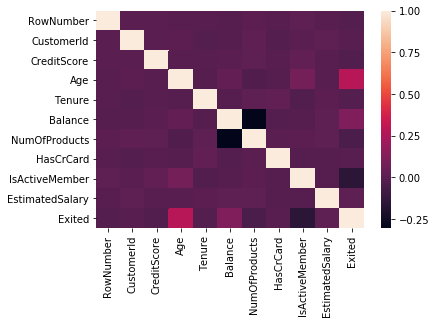

In [10]:
#chekc correlation of target "y" with each other data
corr = dataset.corr()
sb.heatmap(corr)

In [11]:
# easy way to check correlation of target variable to all oather features after getdummies
print (corr['Exited'].sort_values(ascending=False)[:15], '\n') #top 15 values
print ('----------------------')
print (corr['Exited'].sort_values(ascending=False)[-10:]) #last 5 values`

Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
CustomerId        -0.006248
HasCrCard         -0.007138
Tenure            -0.014001
RowNumber         -0.016571
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64 

----------------------
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
CustomerId        -0.006248
HasCrCard         -0.007138
Tenure            -0.014001
RowNumber         -0.016571
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64


In [12]:
# df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [13]:
# We create matrices of the features of dataset and the target variable,
# split datasetb into x(features) and y(label
x_data = dataset.iloc[:, 3:13].values
y_data = dataset.iloc[:, 13].values
print("x_data: ",x_data.shape, "y_data: ",y_data.shape)
x_data

x_data:  (10000, 10) y_data:  (10000,)


array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [14]:
y_data

array([1, 0, 1, ..., 1, 1, 0])

In [15]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
"""
#Geography and Gender has a object datatype(string variables) we have to encode it
We make the analysis simpler by encoding string(OBJECT type) variables.
We are using the ScikitLearn function ‘LabelEncoder’ to automatically encode the different labels
in the columns with values between 0 to n_classes-1.
"""
labelencoder_X_1 = LabelEncoder() 
x_data[:,1] = labelencoder_X_1.fit_transform(x_data[:,1])

labelencoder_X_2 = LabelEncoder() 
x_data[:, 2] = labelencoder_X_2.fit_transform(x_data[:, 2])
"""
It label France=0,  Spain=2,  Germany= 1 using LabelEncoder
"""
print(x_data.shape)
x_data

(10000, 10)


array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [16]:
"""We use the same ScikitLearn library and another function called the OneHotEncoder to just pass the column
number creating a dummy variable."""
onehotencoder = OneHotEncoder(categorical_features = [1])
x_data = onehotencoder.fit_transform(x_data).toarray()
x_data = x_data[:, 1:]
print(x_data.shape)
x_data

(10000, 11)


array([[0.0000000e+00, 0.0000000e+00, 6.1900000e+02, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [0.0000000e+00, 1.0000000e+00, 6.0800000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [0.0000000e+00, 0.0000000e+00, 5.0200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [0.0000000e+00, 0.0000000e+00, 7.0900000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [1.0000000e+00, 0.0000000e+00, 7.7200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [0.0000000e+00, 0.0000000e+00, 7.9200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [17]:
# new_df = dataset

In [18]:
type(y_data)

numpy.ndarray

In [22]:
# train, test = train_test_split(new_df, test_size=0.2)
# train, val = train_test_split(train, test_size=0.2)

# print(len(train), 'train examples')
# print(len(val), 'validation examples')
# print(len(test), 'test examples')

In [19]:
# # A utility method to create a tf.data dataset from a Pandas Dataframe
# def df_to_dataset(dataframe, shuffle=True, batch_size=32):
#     dataframe = dataframe.copy()
#     # remove label from datset
#     labels = dataframe.pop('Exited')
#     ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
#     if shuffle:
#         ds = ds.shuffle(buffer_size=len(dataframe))
#         ds = ds.batch(batch_size)
#     return ds

In [20]:
# batch_size = 50 # A small batch sized is used for demonstration purposes
# train_ds = df_to_dataset(train, batch_size=batch_size)
# val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
# test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

In [21]:
# type(train_ds)

In [22]:
# data = tf.read_file(dataset)
# reader = tf.data.TextLineReader(skip_header_line=1)

In [23]:
# training_set = tf.contrib.learn.datasets.base.load_csv_with_header(
#         filename=IRIS_TRAINING,
#         target_dtype=np.int,
#         features_dtype=np.float32)

In [24]:
#Splitting the dataset into the Training set and the Test Set
X_train, X_test, Y_train, Y_test = train_test_split(x_data, y_data, test_size = 0.2)
print("x_train : ", X_train.shape, " x_test : ", X_test.shape)

# Saving testing file into pickle file
test_file = open("CSV_files/Testing_file.pickle","wb")
pickle.dump(X_test, test_file)
pickle.dump(Y_test, test_file) 
test_file.close()

# split dataset into training and crossvalidation set
x_train, x_cv, y_train, y_cv = train_test_split(X_train, Y_train, test_size = 0.20)
print("x_train_data : ", x_train.shape, " x_crossV_data : ", x_cv.shape)

x_train :  (8000, 11)  x_test :  (2000, 11)
x_train_data :  (6400, 11)  x_crossV_data :  (1600, 11)


In [25]:
with open('CSV_files/Preprocessing_file.pickle','wb') as f:
        pickle.dump([x_train,y_train,x_cv,y_cv],f)

In [26]:
file = open('CSV_files/Preprocessing_file.pickle','rb')
x_train,y_train,x_cv,y_cv = pickle.load(file)

In [27]:
# Feature Scaling
"""
we are fitting and transforming the training data using the StandardScaler function.
We standardize our scaling so that we use the same fitted method to transform/scale test data. 
"""
sc = StandardScaler() 
x_train = sc.fit_transform(x_train) 
# Data scaled properly. And done with preprocessing 
# If we fit_tranform on train data then no need to fit it again

In [28]:
len(x_train)
print(x_train.shape)

(6400, 11)


In [79]:
# Build model
# intialize the nuerons in 3 hidden layer 
n_nodes_hl1 = 500
n_nodes_hl2 = 580
n_nodes_hl3 = 300 

n_classes = 10
batch_size = 100

In [27]:
"""A placeholder is simply a variable that we will assign data to at a later date. 
It allows us to create our operations and build our computation graph, without needing the data. 
In TensorFlowterminology, we then feed data into the graph through these placeholders.
"""

x_data = tf.placeholder('float', [None, x_train.shape[1]])
y_data = tf.placeholder('float')

In [28]:
x_data.shape

TensorShape([Dimension(None), Dimension(11)])

In [25]:
# train_data = (np.random.sample((100,2)), np.random.sample((100,1)))
# test_data = (np.random.sample((20,2)), np.random.sample((20,1)))

In [ ]:
#  train_x = list(features[:,0][:-testing_size])
#     train_y = list(features[:,1][:-testing_size])
#     test_x = list(features[:,0][-testing_size:])
#     test_y = list(features[:,1][-testing_size:])
    

In [42]:
x_data.shape, y_data.shape

(TensorShape([Dimension(None), Dimension(11)]), TensorShape(None))

In [30]:
x_train.shape, y_train.shape, type(x_train), type(y_train)

((6400, 11), (6400, 1), numpy.ndarray, numpy.ndarray)

In [34]:
import tensorflow as tf

y_train = y_train.reshape(6400,1)
y_cv = y_cv.reshape(-1,1)

n_nodes_hl1 = 500
n_nodes_hl2 = 500
n_nodes_hl3 = 500

n_classes = 2
batch_size = 5500

# x_train,y_train,x_cv,y_cv

x = tf.placeholder('float', [None, x_train.shape[1]])
y = tf.placeholder('float')
print(y.shape, type(y))

def neural_network_model(data):
    hidden_1_layer = {'weights':tf.Variable(tf.random_normal([x_train.shape[1], n_nodes_hl1])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl1]))}

    hidden_2_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl1, n_nodes_hl2])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl2]))}

    hidden_3_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl2, n_nodes_hl3])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl3]))}

    output_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl3, n_classes])),
                    'biases':tf.Variable(tf.random_normal([n_classes])),}


    l1 = tf.add(tf.matmul(data,hidden_1_layer['weights']), hidden_1_layer['biases'])
    l1 = tf.nn.relu(l1)

    l2 = tf.add(tf.matmul(l1,hidden_2_layer['weights']), hidden_2_layer['biases'])
    l2 = tf.nn.relu(l2)

    l3 = tf.add(tf.matmul(l2,hidden_3_layer['weights']), hidden_3_layer['biases'])
    l3 = tf.nn.relu(l3)

    output = tf.matmul(l3,output_layer['weights']) + output_layer['biases']

    return output

def train_neural_network(x):
    prediction = neural_network_model(x)
    cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=prediction,labels = y) )
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    
    hm_epochs = 10
    with tf.Session() as sess:
        sess.run(tf.initialize_all_variables())

        for epoch in range(hm_epochs):
            epoch_loss = 0
            for _ in range(10):
                _, c = sess.run([optimizer, cost], feed_dict={x:x_train, y:y_train})
                epoch_loss += c

            print('Epoch', epoch, 'completed out of',hm_epochs,'loss:',epoch_loss)

        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))

        accuracy = tf.reduce_mean(tf.cast(correct, 'float')) * 100
        print('Accuracy:',accuracy.eval({x:x_cv, y:y_cv}))

train_neural_network(x)
# print(x_data.shape, y_data.shape, type(x_cv), type(x_cv))
# print(int(mnist.train.num_examples/batch_size)) = 550
# print(int(mnist.train.num_examples))
# print(type(neural_network_model(x)))
# epoch_x, epoch_y = mnist.train.next_batch(batch_size)

# print(type(epoch_x))

<unknown> <class 'tensorflow.python.framework.ops.Tensor'>
Epoch 0 completed out of 10 loss: 15941.245483398438
Epoch 1 completed out of 10 loss: 10834.899047851562
Epoch 2 completed out of 10 loss: 9310.649108886719
Epoch 3 completed out of 10 loss: 8431.085693359375
Epoch 4 completed out of 10 loss: 8005.950622558594
Epoch 5 completed out of 10 loss: 7859.496826171875
Epoch 6 completed out of 10 loss: 7891.5115966796875
Epoch 7 completed out of 10 loss: 8141.02880859375
Epoch 8 completed out of 10 loss: 8482.151428222656
Epoch 9 completed out of 10 loss: 8713.907531738281
Accuracy: 0.194375


In [166]:
print(epoch_x.shape, epoch_y.shape, x_data.shape, y_data.shape)


(100, 784) (100, 10) (10000, 11) (10000, 1)


In [ ]:
file = 